<a href="https://colab.research.google.com/github/Rohitcvs/Python-Concepts-Exercises/blob/main/Classilfy_Images_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Install Tensorflow 2.2.0 in cloud environment
!pip install tensorflow==2.8.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.6/497.6 MB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 125.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.5/462.5 kB 52.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 94.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 121.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 71.9 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.13.1
    Uninstalling keras-2.13.1:
      Successfully uninstalled keras-2.13.1
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.7.1
    Uninstalling tensorboard-data-server-0.7.1:
      Successfully uninstalled tensorboard-data-server-0.7.1
  Attempting uninstall: google-auth-oauthlib
    Found existin

In [3]:
# Import the necessary packages

from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)


2.8.0


In [4]:
# Get the Fashion MNIST dataset from keras package - Obtain the Training set and the Test set

fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()



4431872/4422102 [==============================] - 0s 0us/step


In [5]:
# Initialize the class names

class_names = ['T-shirt/Top', 'Trouser', 'Fullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Angle Boot']

In [6]:
print(train_images.shape)
print(len(train_labels))
print(train_labels)

print(test_images.shape)
print(len(test_labels))
print(test_labels)

(60000, 28, 28)
60000
[9 0 0 ... 3 0 5]
(10000, 28, 28)
10000
[9 2 1 ... 8 1 5]


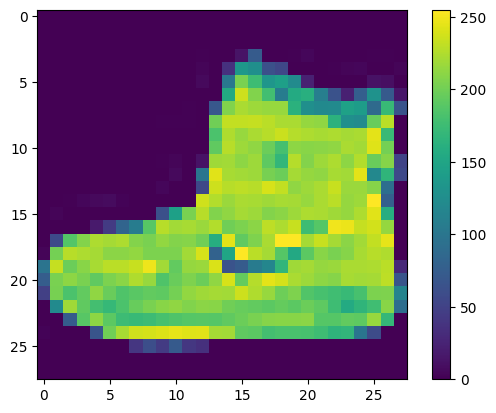

In [7]:
# Plot the first figure in the Train Data

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [8]:
# Normalize the Train and Test Images

train_images = train_images / 255.0
test_images = test_images / 255.0

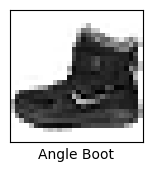

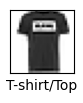

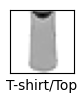

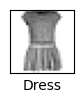

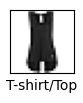

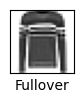

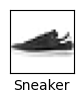

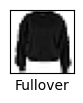

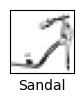

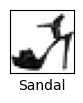

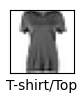

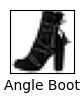

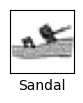

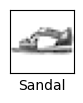

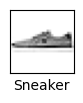

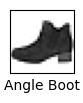

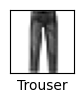

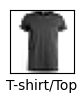

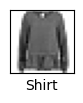

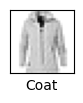

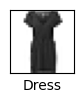

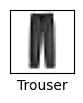

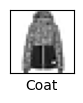

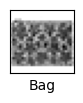

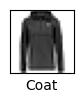

In [10]:
# Plot the sample Train Images
plt.figure(figsize=(10, 10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
  plt.show()

In [11]:
# Initialize the model with 1 Hidden Layer(No of neurons = 128)
# Check the number of parameters in the model

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [12]:
# Set the parameters for the model

model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])


In [13]:
# Train the model for 10 epochs
# If batch_size = 32, then the No of Batches = 60000/32 = 1875

model.fit(train_images, train_labels, epochs=10, verbose=1)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4935 - accuracy: 0.8271
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3746 - accuracy: 0.8649
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3360 - accuracy: 0.8781
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3122 - accuracy: 0.8851
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2964 - accuracy: 0.8916
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2803 - accuracy: 0.8970
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2680 - accuracy: 0.9003
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2582 - accuracy: 0.9035
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2484 - accuracy: 0.9069
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.238

In [14]:
# Evaluate the model and obtain the accuracy and loss

test_loss, test_acc = model.evaluate(test_images, test_labels)
print('\n Test accuracy:', test_acc)
print('\n Test loss:', test_loss)

313/313 [==============================] - 0s 1ms/step - loss: 0.3287 - accuracy: 0.8838

 Test accuracy: 0.8838000297546387

 Test loss: 0.32865801453590393


In [15]:
# Make predictions on Test Images
# Look at the probability score obtained on predicting the Test_Image[0]

prediction = model.predict(test_images)
print(prediction[0])

print('\n Predicted value: ', np.argmax(prediction[0]))
print('\n Groundtruth value: ', test_labels[0])

[8.1712443e-07 4.4806559e-12 1.8936504e-08 5.7462337e-09 4.9742601e-09
 1.6030029e-03 1.9721426e-06 1.5354699e-02 3.2745209e-07 9.8303914e-01]

 Predicted value:  9

 Groundtruth value:  9


In [16]:
# Function to plot Images

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)

  if predicted_label == true_label:
    color='blue'
  else:
    color='red'

  plt.xlabel("({}), {:2.0f}%, ({})".format(class_names[predicted_label], 100 * np.max(predictions_array), class_names[true_label], color = color))

In [28]:
# Function to plot the probability scores for each image

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color='#777777')
  plt.ylim([0,1])
  predicted_label = np.argmax(predictions_array)
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

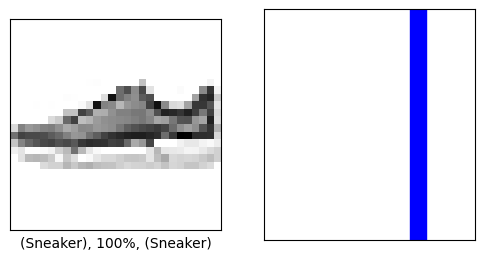

In [29]:
# Take any one test image and make predicted values

i = 9
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, prediction, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, prediction, test_labels)
plt.show()

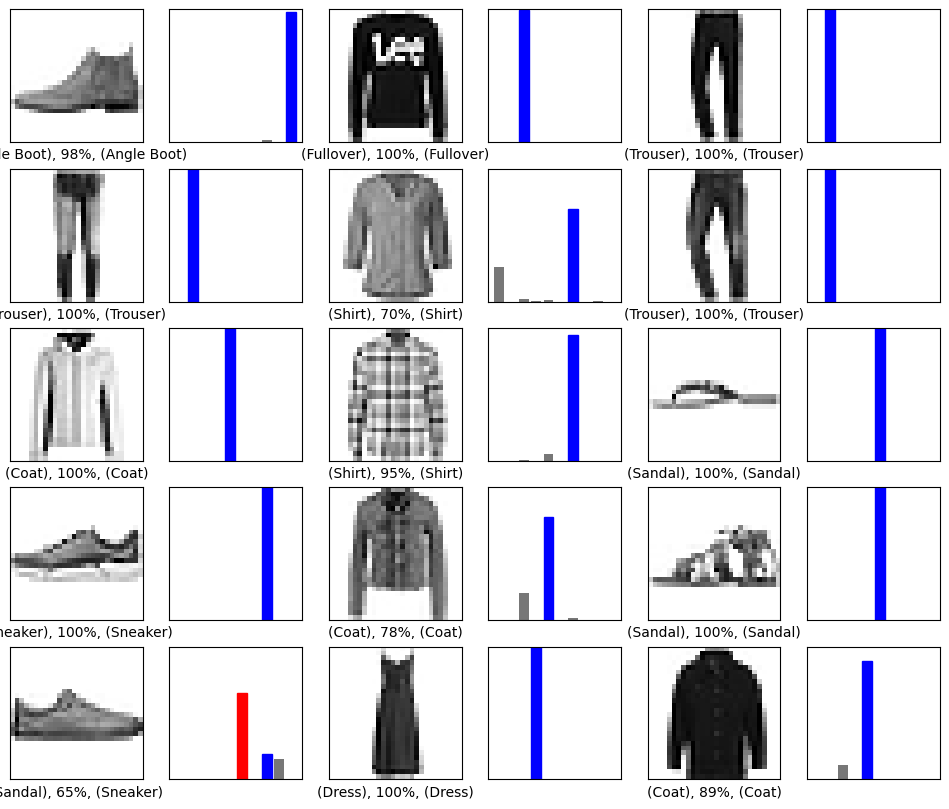

In [30]:
# Visualize the 15 images with the prediction probability scores

num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize = (2 * 2 * num_cols, 2 * num_rows))

for i in range(num_images):
  plt.subplot(num_rows, 2 * num_cols, 2 * i+1)
  plot_image(i, prediction, test_labels, test_images)
  plt.subplot(num_rows, 2 * num_cols, 2 * i+2)
  plot_value_array(i, prediction, test_labels)

plt.show()